# Cleaning and EDA
---

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/weatherAUS.csv')

In [4]:
df.shape

(145460, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


#### Testing to see how much data gets pruned if I drop everything with a null value

In [8]:
df.dropna().shape, df.dropna().shape[0]/df.shape[0]

((56420, 23), 0.38787295476419636)

#### Using Dropna for now as I still have 56,000 entries which is 38.79% of the original dataset

In [9]:
df.dropna(inplace=True)

## Baseline Accuracy

#### Inspecting Target Variable
Baseline Accuracy is 77.97%

In [10]:
df['RainTomorrow'].value_counts()

No     43993
Yes    12427
Name: RainTomorrow, dtype: int64

In [11]:
df['RainTomorrow'].value_counts(normalize=True)

No     0.779741
Yes    0.220259
Name: RainTomorrow, dtype: float64

#### Mapping target variable to binary values

In [12]:
df['RainTomorrow'] = df['RainTomorrow'].map({'No':0,'Yes':1})

#### Making a month column out of Date (2nd value is month)

In [13]:
df['Date'].iloc[6000].split('-')

['2015', '06', '17']

In [14]:
df['Month'] = df['Date'].str.split("-", n = 2, expand = True)[1].astype(int)
df['Month'].value_counts()

1     5267
3     5174
5     4896
10    4811
8     4728
11    4717
7     4709
9     4638
6     4565
4     4422
12    4264
2     4229
Name: Month, dtype: int64

#### Mapping month numbers to names

In [15]:
months = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sept",10:"Oct",11:"Nov",12:"Dec"}

In [16]:
df['Month'] = df['Month'].map(months)

In [17]:
df['Month'].value_counts()

Jan     5267
Mar     5174
May     4896
Oct     4811
Aug     4728
Nov     4717
Jul     4709
Sept    4638
Jun     4565
Apr     4422
Dec     4264
Feb     4229
Name: Month, dtype: int64

#### Making weather station location names lowercase

In [18]:
df['Location'] = df['Location'].str.lower()

### Checking Additional Variables

In [19]:
df[['RainToday']].value_counts()

RainToday
No           43958
Yes          12462
dtype: int64

#### Mapping RainToday to binary values

In [20]:
df['RainToday'] = df['RainToday'].map({'No':0,'Yes':1})

In [21]:
df[['MinTemp','MaxTemp']].describe() #The minimum and maximum temperature in degrees celsius

,MinTemp,MaxTemp
count,56420.000000,56420.000000
mean,13.464770,24.219206
std,6.416689,6.970676
min,-6.700000,4.100000
25%,8.600000,18.700000
50%,13.200000,23.900000
75%,18.400000,29.700000
max,31.400000,48.100000


In [22]:
df['Sunshine'].describe() #The number of hours of bright sunshine in the day.

count    56420.000000
mean         7.735626
std          3.758153
min          0.000000
25%          5.000000
50%          8.600000
75%         10.700000
max         14.500000
Name: Sunshine, dtype: float64

In [23]:
df['Rainfall'].describe() #The amount of rainfall recorded for the day in mm

count    56420.000000
mean         2.130397
std          7.014822
min          0.000000
25%          0.000000
50%          0.000000
75%          0.600000
max        206.200000
Name: Rainfall, dtype: float64

In [24]:
df['WindGustDir'].value_counts() #The direction of the strongest wind gust in the 24 hours to midnight

E      4516
N      4210
W      4161
SW     4052
ENE    4028
SE     3930
SSW    3898
WSW    3791
S      3636
ESE    3312
SSE    3295
NE     3185
WNW    2989
NW     2612
NNE    2516
NNW    2289
Name: WindGustDir, dtype: int64

In [25]:
df['WindGustSpeed'].describe() #The speed (km/h) of the strongest wind gust in the 24 hours to midnight

count    56420.000000
mean        40.877366
std         13.335232
min          9.000000
25%         31.000000
50%         39.000000
75%         48.000000
max        124.000000
Name: WindGustSpeed, dtype: float64

In [26]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Month'],
      dtype='object')

In [27]:
df.to_csv('../data/weather_cleaned.csv')

## Visualizations

#### Correlations

<AxesSubplot:>

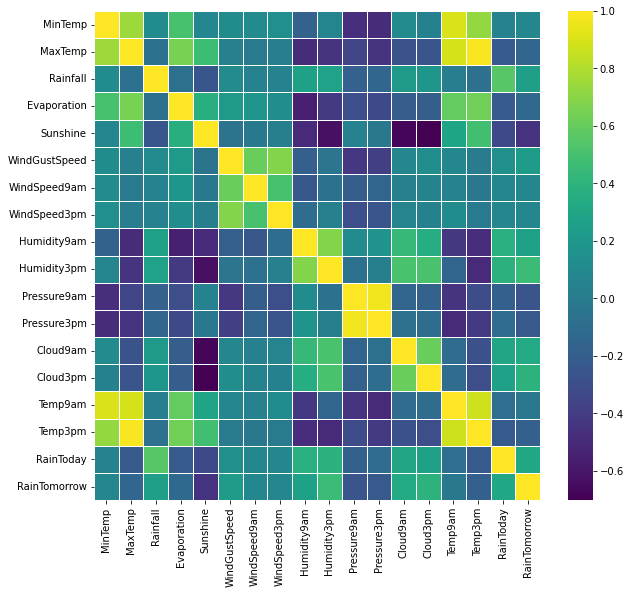

In [30]:
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(),cmap='viridis',linewidths=1)
#plt.savefig()

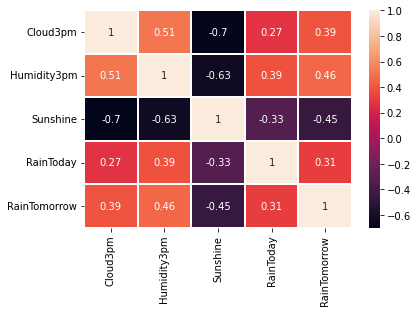

In [33]:
sns.heatmap(df[['Cloud3pm','Humidity3pm','Sunshine','RainToday','RainTomorrow']].corr(),cmap='rocket',annot=True,linewidths=2);

#### Distribution of Rain Tomorrow grouped by whether it was raining on that day

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

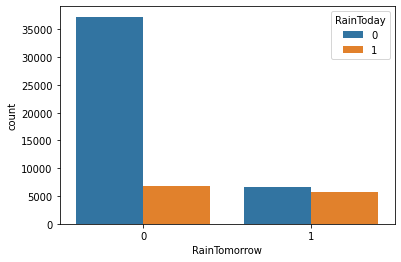

In [49]:
sns.countplot(x=df['RainTomorrow'],hue=df['RainToday'])
#plt.yscale('symlog') #Scaling Y axis to make data differences more visible

<AxesSubplot:xlabel='Sunshine', ylabel='RainTomorrow'>

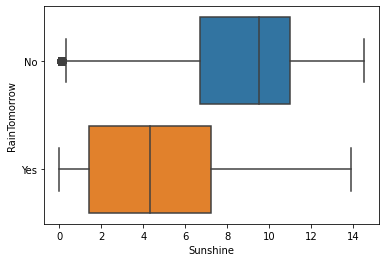

In [46]:
sns.boxplot(y=df['RainTomorrow'].map({1:'Yes',0:'No'}),x=df['Sunshine'],orient='h')

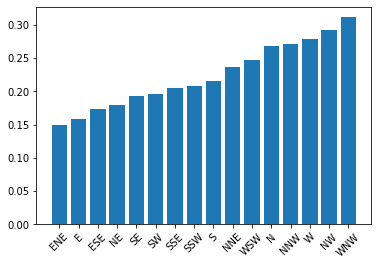

In [73]:
plt.bar(height=df['RainTomorrow'].groupby(df['WindGustDir']).describe().sort_values('mean')['mean'],
        x=df['RainTomorrow'].groupby(df['WindGustDir']).describe().sort_values('mean').index)
plt.xticks(rotation=45);

In [80]:
df[['MinTemp','MaxTemp']].groupby(df['Month']).mean()

,MinTemp,MaxTemp
Month,,
Apr,14.121574,24.594708
Aug,8.894501,19.475042
Dec,17.008771,28.310342
Feb,18.397304,29.507827
Jan,18.479210,30.124340
Jul,8.403483,18.080697
Jun,9.109157,18.498598
Mar,16.851527,27.592114
May,11.041422,21.022406
